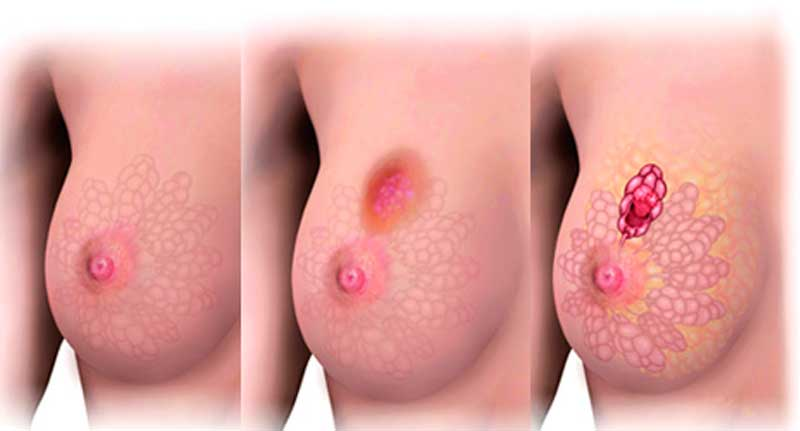

De acordo com o estudo, o Brasil deve registrar 73.610 novos casos de câncer de mama em 2025. Em 2023, foram mais de 20 mil óbitos, com maior concentração nas regiões Sul, Sudeste e Nordeste. Santa Catarina apresenta a maior taxa ajustada do país: 74,79 por 100 mil mulheres. O levantamento também aponta tendência de redução da mortalidade entre mulheres de 40 a 49 anos, reforçando a importância do acesso ao diagnóstico precoce.
* https://www.gov.br/saude/pt-br/assuntos/noticias/2025/outubro/ministerio-da-saude-e-inca-apresentam-publicacao-com-dados-atualizados-sobre-cancer-de-mama-no-brasil

# Importância do modelo

 Para situações como previsão de doenças, é fundamental identificar corretamente os casos positivos. Um falso negativo geralmente tem consequências mais graves do que um falso positivo. Por isso é importante um alto recall, que pode ajudar mulheres a buscarem tratamento antes que o câncer avance. Meu modelo poderia ajudar a identificar mulheres em risco precocemente.

# Sobre o dataset - Breast Cancer Wisconsin (Diagnostic) Data Set
As características são calculadas a partir de uma imagem digitalizada de uma amostra obtida por punção aspirativa com agulha fina (PAAF) de uma massa mamária. Elas descrevem as características dos núcleos celulares presentes na imagem.
A punção aspirativa com agulha fina ( PAAF ) é um procedimento diagnóstico utilizado para investigar nódulos ou massas. Nessa técnica, uma agulha fina ( calibre 23-25 ​​(0,52 a 0,64 mm de diâmetro externo)), oca, é inserida na massa para coleta de células que, após serem coradas , são examinadas ao microscópio ( biópsia ).


# Dicionário de dados


*   ID number : Número de identificação
*   Diagnosis : Categoria do diagnóstico (M = maligno, B = benigno)

Essas próximas features são divididas em mean(média),SE (desvio padrão) e worst (pior ou maior )

*   radius : raio (média das distâncias do centro aos pontos do perímetro)
*   texture : textura (desvio padrão dos valores em escala de cinza)
*   perimeter : perímetro da massa
*   area : área da massa
*   smoothness: suavidade (variação local nos comprimentos dos raios)
*   compactness : compacidade (perímetro² / área - 1,0)
*   concavity :concavidade (severidade das porções côncavas do contorno)
*   concave points : número de porções côncavas do contorno
*   symmetry : simetria
*   fractal dimension :  uma dimensão fractal é um termo invocado na ciência da geometria para fornecer um índice estatístico racional de detalhes de complexidade em um padrão. Um padrão fractal muda com a escala em que é medido. ("coastline approximation" - 1)

* EX: Por exemplo, o campo 3 radius_mean é o Raio Médio, o campo
13 radius_se é o Erro Padrão do Raio, o campo 23 radius_worst é o Pior Raio.




In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

cancer_df = pd.read_csv('/content/breast_cancer.csv')
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# verificando se existem dados faltantes
cancer_df.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


retirando colunas irrelevantes


In [ ]:
cancer_df = cancer_df.drop(['id','Unnamed: 32'],axis=1)
cancer_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Investigando a relação de algumas variáveis com o diagnóstico de câncer de mama

In [ ]:
cancer_df['diagnosis']=cancer_df['diagnosis'].map({'M':'Maligno','B':'Benigno'})
map_cor ={'Maligno':'#BA0B23','Benigno':'#2DB5E3'}
sns.set_theme(style="darkgrid")

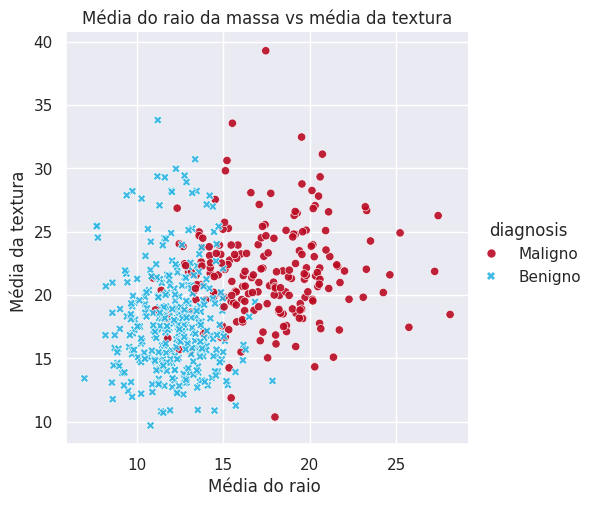

In [ ]:

sns.relplot(data=cancer_df,kind='scatter',x='radius_mean',y='texture_mean',hue='diagnosis',palette=map_cor,style='diagnosis',alpha=0.9)
plt.title('Média do raio da massa vs média da textura')
plt.xlabel('Média do raio ')
plt.ylabel('Média da textura ')
plt.show()

Grandes raios estão associados com o diagnóstico de massa maligna

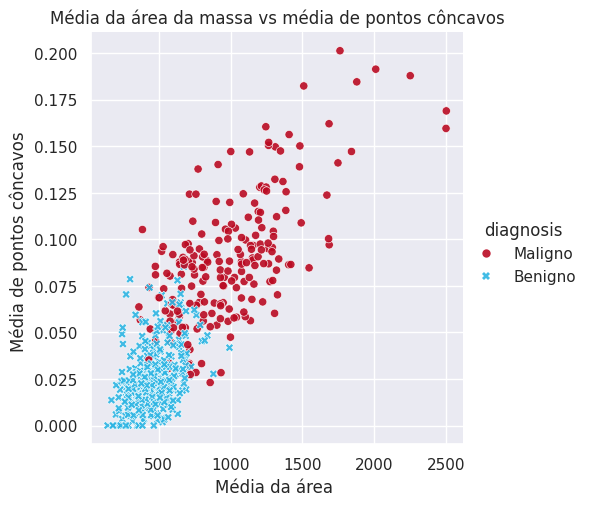

In [ ]:
sns.relplot(data=cancer_df,kind='scatter',x='area_mean',y='concave points_mean',hue='diagnosis',palette=map_cor,style='diagnosis',alpha=0.9)
plt.title('Média da área da massa vs média de pontos côncavos')
plt.xlabel('Média da área ')
plt.ylabel('Média de pontos côncavos ')
plt.show()

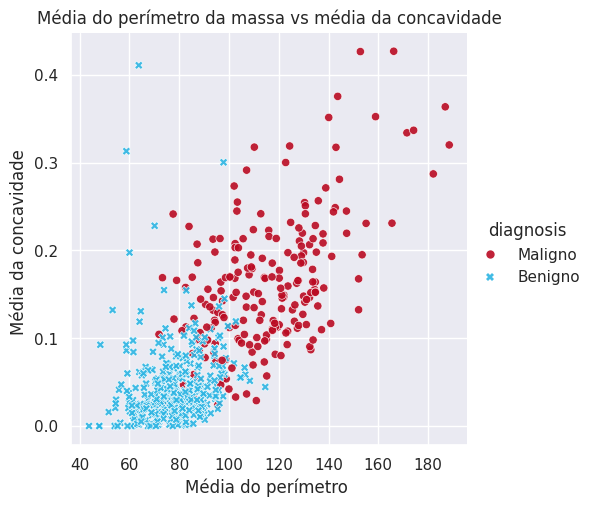

In [ ]:
sns.relplot(data=cancer_df,kind='scatter',x='perimeter_mean',y='concavity_mean',hue='diagnosis',palette=map_cor,style='diagnosis',alpha=0.9)
plt.title('Média do perímetro da massa vs média da concavidade')
plt.xlabel('Média do perímetro ')
plt.ylabel('Média da concavidade ')
plt.show()

Os diagnósticos de massa maligna parecem ter uma correlação com valores maiores das variaveis de x e y

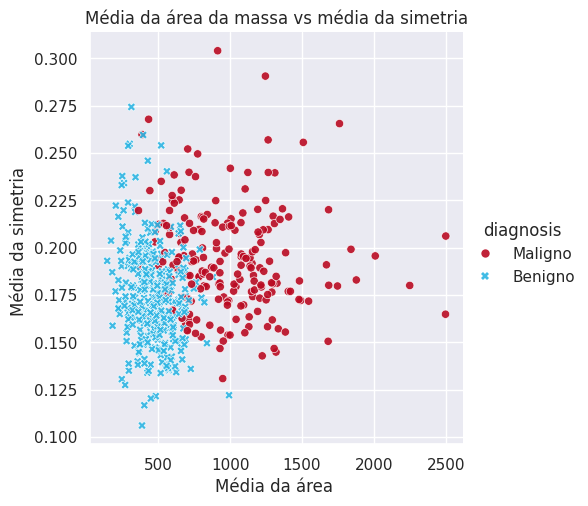

In [ ]:
sns.relplot(data=cancer_df,kind='scatter',x='area_mean',y='symmetry_mean',hue='diagnosis',palette=map_cor,style='diagnosis',alpha=0.9)
plt.title('Média da área da massa vs média da simetria')
plt.xlabel('Média da área ')
plt.ylabel('Média da simetria ')
plt.show()

áreas acima de 500, independente do valor da simetria, estão associados com diagnósticos de massa maligna

# Implementação de uma árvore de decisão com a busca dos melhores parâmetros com Grid search

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report


dicionario ={ 'Maligno':1,'Benigno':0}
cancer_df['diagnosis']=cancer_df['diagnosis'].map(dicionario)
X = cancer_df.drop('diagnosis',axis=1)
y = cancer_df['diagnosis']

seed=78
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=seed)

decision_tree = DecisionTreeClassifier(random_state=seed)

params_dt = {
    'max_depth':[3,4,5,6],
    'min_samples_leaf':[0.01,0.02,0.034,0.05],
    'max_features':[0.3,0.6,0.8,0.95]
}

In [ ]:
grid_dt = GridSearchCV(estimator=decision_tree,param_grid=params_dt,scoring='accuracy',cv=10,n_jobs=-1)
grid_dt.fit(X_train,y_train)
#melhores hiperparâmetros para o modelo
melhores_hiperparam = grid_dt.best_params_
print(melhores_hiperparam)
# melhor cross validation acurácia
melhor_cv = grid_dt.best_score_
print(melhor_cv)

{'max_depth': 3, 'max_features': 0.8, 'min_samples_leaf': 0.02}
0.9473717948717949


Usando o melhor modelo dentre os treinados

In [ ]:
melhor_modelo = grid_dt.best_estimator_
# acurácia do test set
teste_acc =  melhor_modelo.score(X_test,y_test)
print(f'Acurácia do test set do melhor modelo {teste_acc*100:.2f}%')

Acurácia do test set do melhor modelo 94.74%


# Matriz de confusão

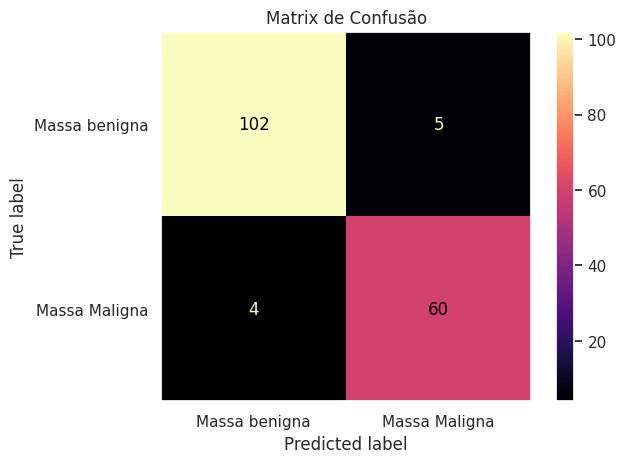

In [ ]:
labels =['Massa benigna','Massa Maligna']
ConfusionMatrixDisplay.from_estimator(melhor_modelo,X_test,y_test,cmap='magma',display_labels=labels)
plt.title('Matrix de Confusão')
plt.grid(False)
plt.show()

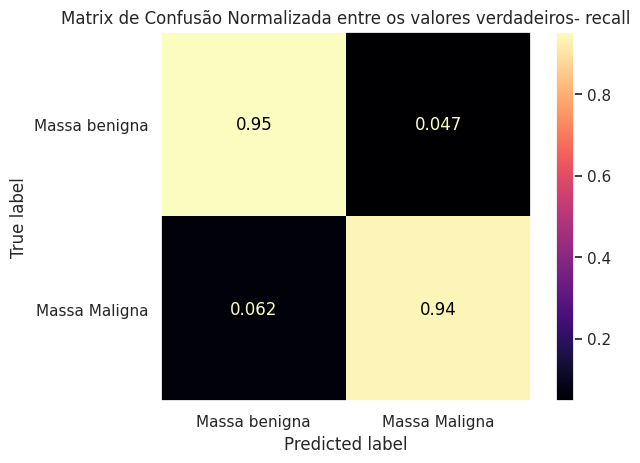

In [ ]:
ConfusionMatrixDisplay.from_estimator(melhor_modelo,X_test,y_test,cmap='magma',display_labels=labels,normalize='true')
plt.title('Matrix de Confusão Normalizada entre os valores verdadeiros- recall')
plt.grid(False)
plt.show()

De todos os casos benignos o modelo classificou corretamente 95% deles como benigno, De todos os casos malignos o modelo classificou corretamente 94% deles como maligno

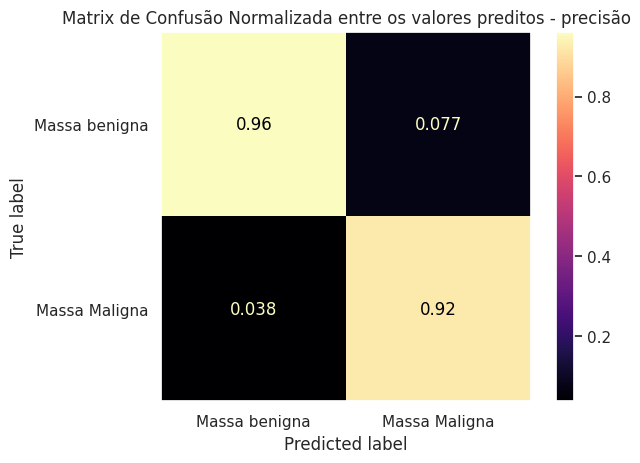

In [ ]:
ConfusionMatrixDisplay.from_estimator(melhor_modelo,X_test,y_test,cmap='magma',display_labels=labels,normalize='pred')
plt.title('Matrix de Confusão Normalizada entre os valores preditos - precisão')
plt.grid(False)
plt.show()

Na precisão da classificação da massa ser benigna, de todas as vezes que o modelo classificou uma massa como benigna ele acertou 96%, e de todas as vezes que o modelo classificou uma massa como maligna ele acertou 92%

# Classification Report

In [ ]:
report = classification_report(y_test,melhor_modelo.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       107
           1       0.92      0.94      0.93        64

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171

